# 1.importing the Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import plotly.express as px
import plotly.io as pio
pio.renderers.default ="svg"


C:\Users\sripriya\AppData\Local\Temp\ipykernel_14468\898506900.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
#!pip install plotly
#!pip install kaleido

# importing the dataset

In [3]:
raw_df=pd.read_csv("Zomato_Mumbai_Dataset.csv",delimiter='|')

In [4]:
raw_df.head()

,NAME,PRICE,CUSINE_CATEGORY,CITY,REGION,URL,PAGE NO,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES
0,Hitchki,1200,"Modern Indian,North Indian,Chinese,Momos,Birya...",Mumbai,First International Financial Centre-- Bandra ...,https://www.zomato.com/mumbai/hitchki-bandra-k...,1,Casual Dining,12noon to 130am(Mon-Sun),Excellent,4.9,3529
1,Baba Falooda,400,"Desserts,Ice Cream,Beverages",Mumbai,Mahim,https://www.zomato.com/mumbai/baba-falooda-mah...,1,Dessert Parlor,2pm to 1am(Mon-Sun),Very Good,4.4,1723
2,Chin Chin Chu,1800,"Asian,Chinese",Mumbai,Juhu,https://www.zomato.com/mumbai/chin-chin-chu-ju...,1,Casual Dining,12noon to 1am(Mon-Sun),Very Good,4.2,337
3,Butterfly High,1000,Modern Indian,Mumbai,Bandra Kurla Complex,https://www.zomato.com/mumbai/butterfly-high-b...,1,Bar,12noon to 130am(Mon-Sun),Very Good,4.3,1200
4,BKC DIVE,1200,"North Indian,Chinese,Continental",Mumbai,Bandra Kurla Complex,https://www.zomato.com/mumbai/bkc-dive-bandra-...,1,Bar,1130am to 1am(Mon-Sun),Veľmi dobré,4.4,5995


# 3. Getting Basic information about the dataset

In [5]:
raw_df.shape

(15081, 12)

In [6]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15081 entries, 0 to 15080
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   NAME             15081 non-null  object
 1   PRICE            15080 non-null  object
 2   CUSINE_CATEGORY  15079 non-null  object
 3   CITY             15080 non-null  object
 4   REGION           15080 non-null  object
 5   URL              15080 non-null  object
 6   PAGE NO          15080 non-null  object
 7   CUSINE TYPE      15080 non-null  object
 8   TIMING           15015 non-null  object
 9   RATING_TYPE      14070 non-null  object
 10  RATING           15080 non-null  object
 11  VOTES            15080 non-null  object
dtypes: object(12)
memory usage: 1.4+ MB


In [7]:
raw_df.describe()

,NAME,PRICE,CUSINE_CATEGORY,CITY,REGION,URL,PAGE NO,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES
count,15081,15080,15079,15080,15080,15080,15080,15080,15015,14070,15080,15080
unique,12720,67,3183,2,241,13823,944,23,2551,31,35,1124
top,NAME,400,CUSINE_CATEGORY,Mumbai,REGION,URL,PAGE NO,Quick Bites,11am to 11pm(Mon-Sun),Average,-,-
freq,942,2042,942,14138,942,942,942,5262,1192,5112,2360,2360


# cleaning the dataset
a.Removing the redundunt rows of data

In [8]:
# checking redundunt rows of data
wrong_data =raw_df["PAGE NO"]=="PAGE NO"
raw_df[wrong_data]

,NAME,PRICE,CUSINE_CATEGORY,CITY,REGION,URL,PAGE NO,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES
15,NAME,PRICE,CUSINE_CATEGORY,CITY,REGION,URL,PAGE NO,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES
31,NAME,PRICE,CUSINE_CATEGORY,CITY,REGION,URL,PAGE NO,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES
47,NAME,PRICE,CUSINE_CATEGORY,CITY,REGION,URL,PAGE NO,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES
63,NAME,PRICE,CUSINE_CATEGORY,CITY,REGION,URL,PAGE NO,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES
79,NAME,PRICE,CUSINE_CATEGORY,CITY,REGION,URL,PAGE NO,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES
...,...,...,...,...,...,...,...,...,...,...,...,...
15000,NAME,PRICE,CUSINE_CATEGORY,CITY,REGION,URL,PAGE NO,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES
15016,NAME,PRICE,CUSINE_CATEGORY,CITY,REGION,URL,PAGE NO,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES
15032,NAME,PRICE,CUSINE_CATEGORY,CITY,REGION,URL,PAGE NO,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES
15048,NAME,PRICE,CUSINE_CATEGORY,CITY,REGION,URL,PAGE NO,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES


In [9]:
#performing negation of the wrong dataset and then storing the correct data back in the dataset DataFrame
#this permanently remove the wrong data from the original dataframe

raw_df=raw_df[~wrong_data]

In [10]:
#Dropping columns which are not required for further analysis
raw_df.drop(['URL','PAGE NO','CITY'],axis=1,inplace=True)

In [11]:
raw_df.head()

,NAME,PRICE,CUSINE_CATEGORY,REGION,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES
0,Hitchki,1200,"Modern Indian,North Indian,Chinese,Momos,Birya...",First International Financial Centre-- Bandra ...,Casual Dining,12noon to 130am(Mon-Sun),Excellent,4.9,3529
1,Baba Falooda,400,"Desserts,Ice Cream,Beverages",Mahim,Dessert Parlor,2pm to 1am(Mon-Sun),Very Good,4.4,1723
2,Chin Chin Chu,1800,"Asian,Chinese",Juhu,Casual Dining,12noon to 1am(Mon-Sun),Very Good,4.2,337
3,Butterfly High,1000,Modern Indian,Bandra Kurla Complex,Bar,12noon to 130am(Mon-Sun),Very Good,4.3,1200
4,BKC DIVE,1200,"North Indian,Chinese,Continental",Bandra Kurla Complex,Bar,1130am to 1am(Mon-Sun),Veľmi dobré,4.4,5995


# b.Removing the null Records

In [12]:
#checking the null records
raw_df.isnull().sum()

NAME                  0
PRICE                 1
CUSINE_CATEGORY       2
REGION                1
CUSINE TYPE           1
TIMING               66
RATING_TYPE        1011
RATING                1
VOTES                 1
dtype: int64

In [13]:
# checking for null row

raw_df[raw_df['PRICE'].isnull()]

,NAME,PRICE,CUSINE_CATEGORY,REGION,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES
15080,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
# Droping the above row of from the dataset

raw_df=raw_df.drop(labels=15080, axis=0)

In [15]:
# Replacing the other null records with NA
raw_df.fillna('NA', inplace=True)

In [16]:
raw_df.isnull().sum()

NAME               0
PRICE              0
CUSINE_CATEGORY    0
REGION             0
CUSINE TYPE        0
TIMING             0
RATING_TYPE        0
RATING             0
VOTES              0
dtype: int64

# c.Converting the Datatypes of numerical columns to numeric datatype

In [17]:
# checking for text values in the column before converting it to numeric datatype
raw_df['RATING'].value_counts()

RATING
-          2360
3.5        1094
3.4        1036
3.6         960
NEW         953
3.3         926
3.7         917
3.2         801
3.8         782
3.1         734
3.0         622
3.9         596
2.9         409
4.0         408
2.8         309
4.1         298
4.2         199
2.7         170
4.3         148
4.4          99
2.6          77
Opening      57
4.5          46
2.5          39
4.6          32
2.4          26
4.7          13
2.3          10
2.1           5
2.2           4
4.8           4
4.9           2
1.8           1
2.0           1
Name: count, dtype: int64

In [18]:
# Replacing the text values with '0'

raw_df['RATING'].replace(to_replace=['_','NEW','Opening'],value='0',inplace=True)

C:\Users\sripriya\AppData\Local\Temp\ipykernel_14468\3521205011.py:3: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [19]:
# checking for text values in the column before converting it to numeric datatype
raw_df['VOTES'].value_counts()

VOTES
-       2360
NEW      953
4        364
5        320
6        288
        ... 
1029       1
7350       1
964        1
585        1
1249       1
Name: count, Length: 1123, dtype: int64

In [20]:
# Replacing the text values with '0'

raw_df['VOTES'].replace(to_replace=['-','NEW','Opening'],value='0',inplace=True)

C:\Users\sripriya\AppData\Local\Temp\ipykernel_14468\708078482.py:3: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [21]:
#changing data type of the numerical columns
raw_df['PRICE']=raw_df['PRICE'].astype('int64')
raw_df['VOTES']=raw_df['VOTES'].astype('int64')

In [22]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14138 entries, 0 to 15079
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   NAME             14138 non-null  object
 1   PRICE            14138 non-null  int64 
 2   CUSINE_CATEGORY  14138 non-null  object
 3   REGION           14138 non-null  object
 4   CUSINE TYPE      14138 non-null  object
 5   TIMING           14138 non-null  object
 6   RATING_TYPE      14138 non-null  object
 7   RATING           14138 non-null  object
 8   VOTES            14138 non-null  int64 
dtypes: int64(2), object(7)
memory usage: 1.1+ MB


# d.Working with "Timing' column

In [23]:
raw_df['TIMING'].value_counts()

TIMING
11am to 11pm(Mon-Sun)                              1192
11am to 12midnight(Mon-Sun)                         632
12noon to 12midnight(Mon-Sun)                       467
11am to 1130pm(Mon-Sun)                             309
10am to 10pm(Mon-Sun)                               267
                                                   ... 
1130am to 4pm,630pm to 1230AM...                      1
12midnight to 5am,12noon to 12midnight(Mon-Sun)       1
12midnight to 1230AM,12noon to 4pm,7pm to ...         1
12noon to 330pm,630pm to 12midnight...                1
8am to 11pm,12midnight to 115am(Mon-Sun)              1
Name: count, Length: 2551, dtype: int64

In [24]:
# splitting the column and storing it in temp_df Dataframe

temp_df =raw_df['TIMING'].str.split("(", n=1,expand=True)
temp_df

,0,1
0,12noon to 130am,Mon-Sun)
1,2pm to 1am,Mon-Sun)
2,12noon to 1am,Mon-Sun)
3,12noon to 130am,Mon-Sun)
4,1130am to 1am,Mon-Sun)
...,...,...
15075,"8am to 11pm,12midnight to 115am",Mon-Sun)
15076,11am to 230am,Mon-Sun)
15077,11am to 11pm,"Mon,Tue,Wed,Thu,Sun),11am to ..."
15078,9am to 1230AM,Mon-Sun)


In [25]:
# Assingning the columns back to the raw_df dataframe

raw_df['TIMING']=temp_df[0]
raw_df['DAYS_OPEN']=temp_df[1]
raw_df.head()


,NAME,PRICE,CUSINE_CATEGORY,REGION,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES,DAYS_OPEN
0,Hitchki,1200,"Modern Indian,North Indian,Chinese,Momos,Birya...",First International Financial Centre-- Bandra ...,Casual Dining,12noon to 130am,Excellent,4.9,3529,Mon-Sun)
1,Baba Falooda,400,"Desserts,Ice Cream,Beverages",Mahim,Dessert Parlor,2pm to 1am,Very Good,4.4,1723,Mon-Sun)
2,Chin Chin Chu,1800,"Asian,Chinese",Juhu,Casual Dining,12noon to 1am,Very Good,4.2,337,Mon-Sun)
3,Butterfly High,1000,Modern Indian,Bandra Kurla Complex,Bar,12noon to 130am,Very Good,4.3,1200,Mon-Sun)
4,BKC DIVE,1200,"North Indian,Chinese,Continental",Bandra Kurla Complex,Bar,1130am to 1am,Veľmi dobré,4.4,5995,Mon-Sun)


In [26]:
# checking for null records in Days_open column
raw_df.isnull().sum()

NAME                 0
PRICE                0
CUSINE_CATEGORY      0
REGION               0
CUSINE TYPE          0
TIMING               0
RATING_TYPE          0
RATING               0
VOTES                0
DAYS_OPEN          160
dtype: int64

In [27]:
#replacing the null values with 'NA'

raw_df.fillna('NA',inplace=True)

In [28]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14138 entries, 0 to 15079
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   NAME             14138 non-null  object
 1   PRICE            14138 non-null  int64 
 2   CUSINE_CATEGORY  14138 non-null  object
 3   REGION           14138 non-null  object
 4   CUSINE TYPE      14138 non-null  object
 5   TIMING           14138 non-null  object
 6   RATING_TYPE      14138 non-null  object
 7   RATING           14138 non-null  object
 8   VOTES            14138 non-null  int64 
 9   DAYS_OPEN        14138 non-null  object
dtypes: int64(2), object(8)
memory usage: 1.2+ MB


# Removing the Restaurant records Whose Rating or votes is o


In [29]:
# finding those restaurant whose has 0 or votes

useless_data =(raw_df['RATING']==0.0) |(raw_df['VOTES']==0)
raw_df[useless_data]

,NAME,PRICE,CUSINE_CATEGORY,REGION,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES,DAYS_OPEN
32,Hotel Annapoorna Refreshments,400,"Maharashtrian,Mughlai,Chinese",Ghansoli,Quick Bites,1030am to 1230AM,Not rated,-,0,Mon-Sun)
34,Biryani 9,600,"Biryani,North Indian",Near Andheri East Station,none,11am to 3am,NA,0,0,Mon-Sun)
36,D Fusion Flavours,350,Chinese,Goregaon East,none,"12noon to 330pm,7pm to 3am",NA,0,0,Mon-Sun)
39,Nation Tadka,400,"North Indian,South Indian,Chinese,Fast Food",Worli,none,12noon to 1230AM,Not rated,-,0,Mon-Sun)
83,Link Way Restaurant,500,"North Indian,Chinese",Jogeshwari,Quick Bites,"12noon to 4pm,8pm to 1am",Not rated,-,0,Mon-Sun)
...,...,...,...,...,...,...,...,...,...,...
14998,Foodies House,0,Chinese,Goregaon East,none,12noon to 4am,NA,0,0,Mon-Sun)
14999,Khansama,0,Biryani,Lower Parel,none,12noon to 3am,NA,0,0,Mon-Sun)
15010,Earth Cafe @ Waterfield,800,"Cafe,Healthy Food,Italian,Pizza,Beverages",Linking Road-- Bandra West,Café,10am to 10pm,NA,0,0,"Mon-Thu),10am to 11pm(Fri-Sun)"
15023,How About Some Cream,200,Beverages,Mumbai Central,Beverage Shop,12noon to 3am,NA,0,0,Mon-Sun)


In [30]:
# performing negation of the useless dataset and then storing the correct data back in the dataset DataFrame
#this permanently remove the wrong data from the original dataframe

raw_df=raw_df[~useless_data]

# f.Working on 'RATING_TYPE' Column

In [31]:
# checking the unique values in the column

raw_df['RATING_TYPE'].value_counts()

RATING_TYPE
Average          5111
Good             4330
Very Good        1137
Excellent          95
Poor               47
Veľmi dobré         6
Skvělá volba        4
Dobrze              4
Bardzo dobrze       3
Ortalama            2
Bueno               2
İyi                 2
Buono               2
Dobré               2
Bom                 2
Priemer             2
Průměr              2
Muito Bom           2
Promedio            2
Muy Bueno           1
Sangat Baik         1
Média               1
Biasa               1
Skvělé              1
Baik                1
Çok iyi             1
Excelente           1
Velmi dobré         1
Media               1
Name: count, dtype: int64

In [32]:
# Translating the texts into proper English text
raw_df['RATING_TYPE'].replace(to_replace='Excelente',value='Excellent',inplace=True)
raw_df['RATING_TYPE'].replace(to_replace=['Veľmi dobré','Bardzo dobrze  ','Muy Bueno  ','Velmi dobré  '],value='very Good',inplace=True)
raw_df['RATING_TYPE'].replace(to_replace=['Skvělá volba ', 'Dobrza','Bueno','Buono','Dobré ','Bom ','Skvělé'],value='Good',inplace=True)
raw_df['RATING_TYPE'].replace(to_replace=['Priemer','Média','Çok iyi'],value='Average',inplace=True)
raw_df['RATING_TYPE'].replace(to_replace=['Průměr','Promedio','Ortalama','Muito Bom','İyi'],value='poor',inplace=True)
                         
raw_df['RATING_TYPE'].replace(to_replace=['Baik','Biasa','Media','Sangat Baik'],value='very poor',inplace=True)                               

C:\Users\sripriya\AppData\Local\Temp\ipykernel_14468\1178598533.py:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



C:\Users\sripriya\AppData\Local\Temp\ipykernel_14468\1178598533.py:3: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, in

In [33]:
# checking all the values correctly mapped

raw_df['RATING_TYPE'].value_counts()

RATING_TYPE
Average          5115
Good             4335
Very Good        1137
Excellent          96
Poor               47
poor               10
very Good           6
Skvělá volba        4
very poor           4
Dobrze              4
Bardzo dobrze       3
Bom                 2
Dobré               2
Velmi dobré         1
Muy Bueno           1
Name: count, dtype: int64

# G.working on 'REGION' column

In [34]:
raw_df['REGION'].value_counts()

REGION
Mira Road                            405
Malad West                           308
Chembur                              277
Kharghar                             268
Borivali West                        264
                                    ... 
Hotel Emerald-- Juhu                   1
Trident-- Bandra Kurla Complex         1
Sea Princess-- Juhu                    1
Aureole Hotel-- Andheri East           1
Hotel Satkar Residency-- Majiwada      1
Name: count, Length: 237, dtype: int64

In [35]:
# removing the irrevelent text from the Region column

raw_df['REGION']=raw_df['REGION'].str.replace('[a-zA-Z].+--','',regex=True)



In [36]:
#removing the west & East from the region column

raw_df['REGION']=raw_df['REGION'].str.replace('West|west|East|east','',regex=True)


In [37]:
raw_df['REGION'].value_counts()

REGION
 Thane          712
 Andheri        409
Mira Road       405
Malad           370
Kandivali       361
               ... 
 CBD Belapur      1
 Byculla          1
 Churchgate       1
 Turbhe           1
 Bhayandar        1
Name: count, Length: 148, dtype: int64

In [38]:
# replacing small regions with known region name
raw_df['REGION']=raw_df['REGION'].str.replace('4 Bungalows|7 Anderi|Azad Nagar|Near Anderi Station|Veera Desai Area','repl')
raw_df['REGION']=raw_df['REGION'].str.replace('Bandra kurla Complex','Bandra' ,regex=True)   
raw_df['REGION']=raw_df['REGION'].str.replace('CBD-Belapur','CBD-Belapur',regex=True) 
raw_df['REGION']=raw_df['REGION'].str.replace('Girgon Chowpatty', 'Chowpatty',regex=True) 
raw_df['REGION']=raw_df['REGION'].str.replace('Dadar Shivaji Park','Dadar',regex=True)
raw_df['REGION']=raw_df['REGION'].str.replace('Flea Bazaar Cafe|kamala Mills Compound','Lower Parel',regex=True)
raw_df['REGION']=raw_df['REGION'].str.replace('Runwal Green','Mulund',regex=True)
raw_df['REGION']=raw_df['REGION'].str.replace('Mumbai CST Area','Mumbai Central',regex=True)
raw_df['REGION']=raw_df['REGION'].str.replace('Kopar Khairane|Seawoods|Turbhe|Ulwe','Navi Mumbai',regex=True)
raw_df['REGION']=raw_df['REGION'].str.replace('New Panvel|Old Panvel','Panvel',regex=True)
raw_df['REGION']=raw_df['REGION'].str.replace('Kamothe','Sion',regex=True)
raw_df['REGION']=raw_df['REGION'].str.replace('Ghodbunder Road|Majiwada','Thane',regex=True)

# H.Removing Duplicate records

In [39]:
# finding the all duplicates rows

raw_df[raw_df.duplicated()]

,NAME,PRICE,CUSINE_CATEGORY,REGION,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES,DAYS_OPEN
4064,Sai Sannidhi Restaurant & Bar,1000,"North Indian,Konkan",Dahisar,Casual Dining,11am to 12midnight,Good,3.7,99,Mon-Sun)
4068,Konkan Katta,400,"Seafood,Maharashtrian,Malwani",Mahakali,Quick Bites,"11am to 330pm,630pm to 1130pm",Good,3.5,181,Mon-Sun)
4082,Usmaniya Hotel,600,Mughlai,Fort,Casual Dining,1030am to 1130pm,Average,3.2,8,Mon-Sun)
4083,Gina's Cakes,450,Bakery,Dombivali,none,11am to 11pm,Good,3.5,49,Mon-Sun)
4084,Konkanastha Lunch Home,400,"Seafood,Malwani",Chakala,Casual Dining,"12noon to 3pm,730pm to 1030pm",Good,3.5,44,Mon-Sun)
...,...,...,...,...,...,...,...,...,...,...
14200,Mezbaan Family Restaurant,350,"Chinese,Mughlai",Mumbra,Dhaba,12noon to 1230AM,Average,2.8,97,Mon-Sun)
14204,Jyoti Lunch Home,650,"Chinese,North Indian,Seafood,Mughlai",Mulund,Casual Dining,11am to 1230AM,Good,3.5,49,Mon-Sun)
14253,On Toes,900,"Italian,North Indian,Chinese",Malad,Casual Dining,"12noon to 3pm,7pm to 1230AM",Good,3.6,76,Mon-Sun)
14761,Frosty Farm,400,"Ice Cream,Desserts,Fast Food",Malad,Dessert Parlor,1pm to 1215AM,Good,3.6,120,Mon-Sun)


In [40]:
# dropping the all duplicate rows
raw_df = raw_df.drop_duplicates()

# 4. copying the cleaned data into a nes DataFrame

In [41]:
Zomato_df =raw_df.copy()

In [42]:
Zomato_df.head()

,NAME,PRICE,CUSINE_CATEGORY,REGION,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES,DAYS_OPEN
0,Hitchki,1200,"Modern Indian,North Indian,Chinese,Momos,Birya...",Bandra Kurla Complex,Casual Dining,12noon to 130am,Excellent,4.9,3529,Mon-Sun)
1,Baba Falooda,400,"Desserts,Ice Cream,Beverages",Mahim,Dessert Parlor,2pm to 1am,Very Good,4.4,1723,Mon-Sun)
2,Chin Chin Chu,1800,"Asian,Chinese",Juhu,Casual Dining,12noon to 1am,Very Good,4.2,337,Mon-Sun)
3,Butterfly High,1000,Modern Indian,Bandra Kurla Complex,Bar,12noon to 130am,Very Good,4.3,1200,Mon-Sun)
4,BKC DIVE,1200,"North Indian,Chinese,Continental",Bandra Kurla Complex,Bar,1130am to 1am,very Good,4.4,5995,Mon-Sun)


# 5. performing Exploratory Data Analysis
Q1) How many restaurants are in mumbai for each type of cuisine?

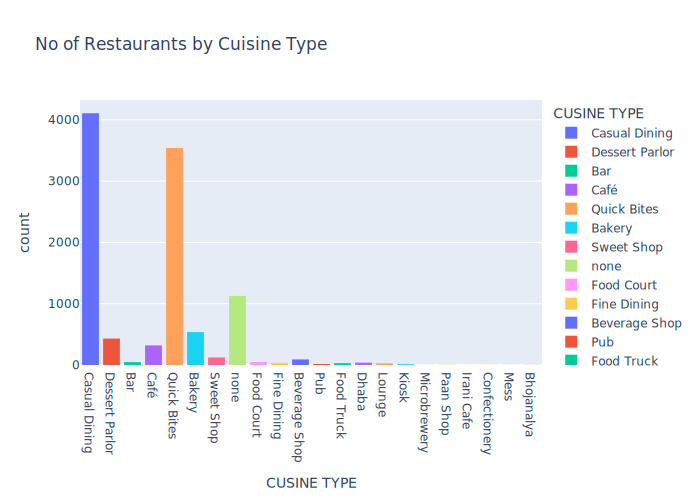

In [43]:
fig =px.histogram(Zomato_df,x='CUSINE TYPE',color='CUSINE TYPE',title ='No of Restaurants by Cuisine Type',
                  labels={'CUISINE TYPE':'Cuisine Type'})
fig.show()

#Q2) What are the percentage of restaurant by rating type in Mumbai?

In [44]:
rating_type_df=Zomato_df['RATING_TYPE'].value_counts().reset_index()
rating_type_df.rename(columns={'index':'RATING TYPE','RATING_TYPE':'COUNT OF RESTAURANTS'},inplace=True)
rating_type_df

,COUNT OF RESTAURANTS,count
0,Average,4983
1,Good,4251
2,Very Good,1134
3,Excellent,96
4,Poor,46
5,poor,10
6,very Good,6
7,Skvělá volba,4
8,very poor,4
9,Dobrze,4


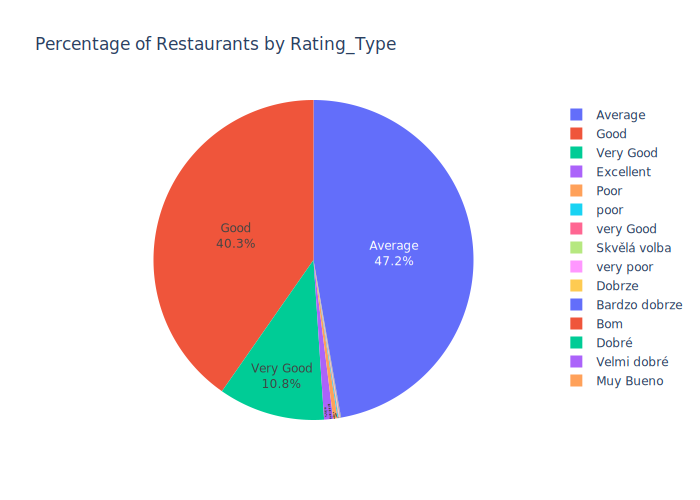

In [45]:
fig =px.pie(rating_type_df, names='COUNT OF RESTAURANTS', values='count',color='COUNT OF RESTAURANTS',
            title ='Percentage of Restaurants by Rating_Type'). update_traces(textposition='inside',textinfo='percent+label')                              
fig.show()

# Q3)Which are the top 10 highest rated Seafood Restaurant in Mumbai?

In [46]:
seafood_df =Zomato_df[Zomato_df['CUSINE_CATEGORY'].str.contains('seafood')]
seafood_df.sort_values(by='RATING' ,ascending=False).head(10)

,NAME,PRICE,CUSINE_CATEGORY,REGION,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES,DAYS_OPEN


# Q4)Which is the best Food Truck in Mumbai

In [47]:
foodtruck_df =Zomato_df[Zomato_df['CUSINE TYPE']=='Food Truck']
foodtruck_df.sort_values(by='RATING',ascending=False).head(2)

,NAME,PRICE,CUSINE_CATEGORY,REGION,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES,DAYS_OPEN
262,Dumpling Delights,200,Momos,Matunga,Food Truck,430pm to 930pm,Very Good,4.3,212,Mon-Sun)
1017,Street Food Co.,250,"Fast Food,Chinese",Virar,Food Truck,6pm to 3am,Very Good,4.1,274,Mon-Sun)


# Q5) Which places have the highest rated restaurant for each cuisine type in mumbai?

In [48]:
# Assuming restaurants having rating above 4.5

highest_rated_df=Zomato_df[Zomato_df['RATING'] == 4.3]
highest_rated_df

,NAME,PRICE,CUSINE_CATEGORY,REGION,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES,DAYS_OPEN


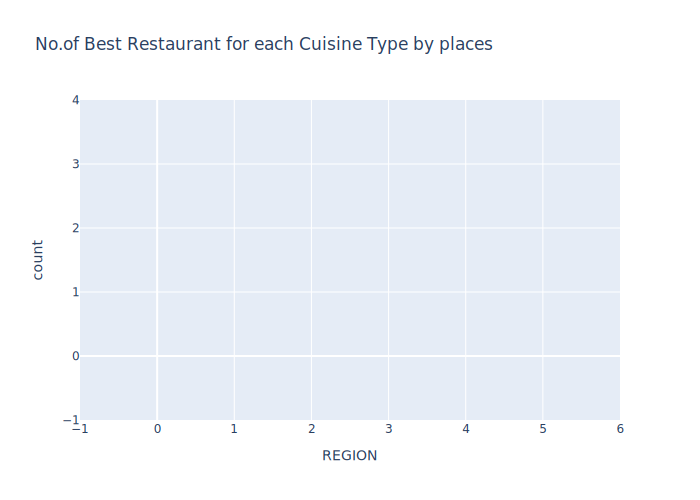

In [49]:
fig =px.histogram(highest_rated_df, x='REGION' ,color='CUSINE TYPE', title='No.of Best Restaurant for each Cuisine Type by places').update_xaxes(categoryorder="total descending")
fig.show()


# Q6) what is the Avg price Distibution of highest rated restaurant for each cuisine type in mumbai?

In [50]:
highest_rated_price_df =highest_rated_df.groupby(by=['REGION','CUSINE TYPE'])['PRICE'].mean().reset_index()
highest_rated_price_df.head()                                               

,REGION,CUSINE TYPE,PRICE


In [51]:
fig=px.scatter(highest_rated_price_df,x="REGION",y="PRICE",color="CUSINE TYPE",symbol="CUSINE TYPE","PRICE","REGION",
          title='Avg Price Distibution of High rated restaurant for each Cusine Type').update_traces(marker_size=10)
fig.show()

SyntaxError: positional argument follows keyword argument (927739402.py, line 2)